In [1]:
# import mysql.connector

# mydb = mysql.connector.connect(
#    host="localhost",
#    port=3306,
#    user="root",
#    password="password"
# )
# cursor = mydb.cursor()
# mycursor.execute('CREAT DATABASE Baigiamojo')
# cursor.execute("SHOW DATABASES")

# for i in cursor:
#    print(i)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
nt = pd.read_csv('/Users/indre/Desktop/BIG DATA MOKYMU MEDZIAGA/PHYTON/archive/nyt-articles-2020.csv')

In [6]:
nt = nt.rename(columns={'n_comments':'number_of_comments'})

In [7]:
nt['pub_date'] = pd.to_datetime(nt['pub_date']).dt.date

In [8]:
 nt_new = nt[[ 'section', 'headline', 'abstract', 'keywords', 'pub_date', 'number_of_comments']]
 nt_new   

,section,headline,abstract,keywords,pub_date,number_of_comments
0,Opinion,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",2020-01-01,186
1,Crosswords & Games,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles'],2020-01-01,257
2,Science,Meteor Showers in 2020 That Will Light Up Nigh...,"All year long, Earth passes through streams of...","['Meteors and Meteorites', 'Space and Astronom...",2020-01-01,6
3,Science,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S...",2020-01-01,2
4,Science,"Rocket Launches, Trips to Mars and More 2020 S...",A year full of highs and lows in space just en...,"['Space and Astronomy', 'Private Spaceflight',...",2020-01-01,25
...,...,...,...,...,...,...
16782,Opinion,What It Takes to Heal From Covid-19,"Survivors can get better, but they need help.","['Chronic Condition (Health)', 'Coronavirus (2...",2020-12-31,166
16783,Sports,Padres Jolt M.L.B. With Bold Moves to Set Up W...,While many teams continued to assess the finan...,"['San Diego Padres', 'Major League Baseball', ...",2020-12-31,42
16784,Business Day,"Their Finances Ravaged, Customers Fear Banks W...",Banks have the power to decide whether to let ...,"['Banking and Financial Institutions', 'Corona...",2020-12-31,556
16785,Food,Should Wine Be Among Your Health Resolutions?,The new category of ‘clean wines’ is an effort...,"['Wines', 'Grapes', 'Diet and Nutrition', 'Dia...",2020-12-31,277


In [9]:
 nt_new.to_csv('nt_new.csv')

In [10]:
nt_section_comments_count = nt_new.groupby(['section'])['number_of_comments'].sum().reset_index() 

In [11]:
nt_section_count = nt_new['section'].value_counts()## kokių straipsnių daugiausia 
nt_section_count = nt_section_count.reset_index().rename(columns={'section':'number_of_articles', 'index': 'section'})

# Kokie straipsniai sulaukia daugiausia komentarų? <Galima įsivertinti kokių straipsnių reikėtų daugiau, kadangi pastarieji stimuliuoja įsitraukimą>

In [12]:
section_articles_comments = pd.merge(nt_section_comments_count, nt_section_count, on=['section'])
section_articles_comments.sort_values("number_of_articles", ascending=False).reset_index()

,index,section,number_of_comments,number_of_articles
0,36,U.S.,1156457,2364
1,18,Opinion,2082114,2272
2,40,World,284874,1183
3,1,Arts,60180,1094
4,16,New York,211581,1055
5,6,Business Day,196889,932
6,30,The Learning Network,113314,708
7,22,Real Estate,46987,687
8,39,Well,81669,630
9,11,Food,58564,573


In [13]:
section_articles_comments.to_csv('section_articles_comments.csv')

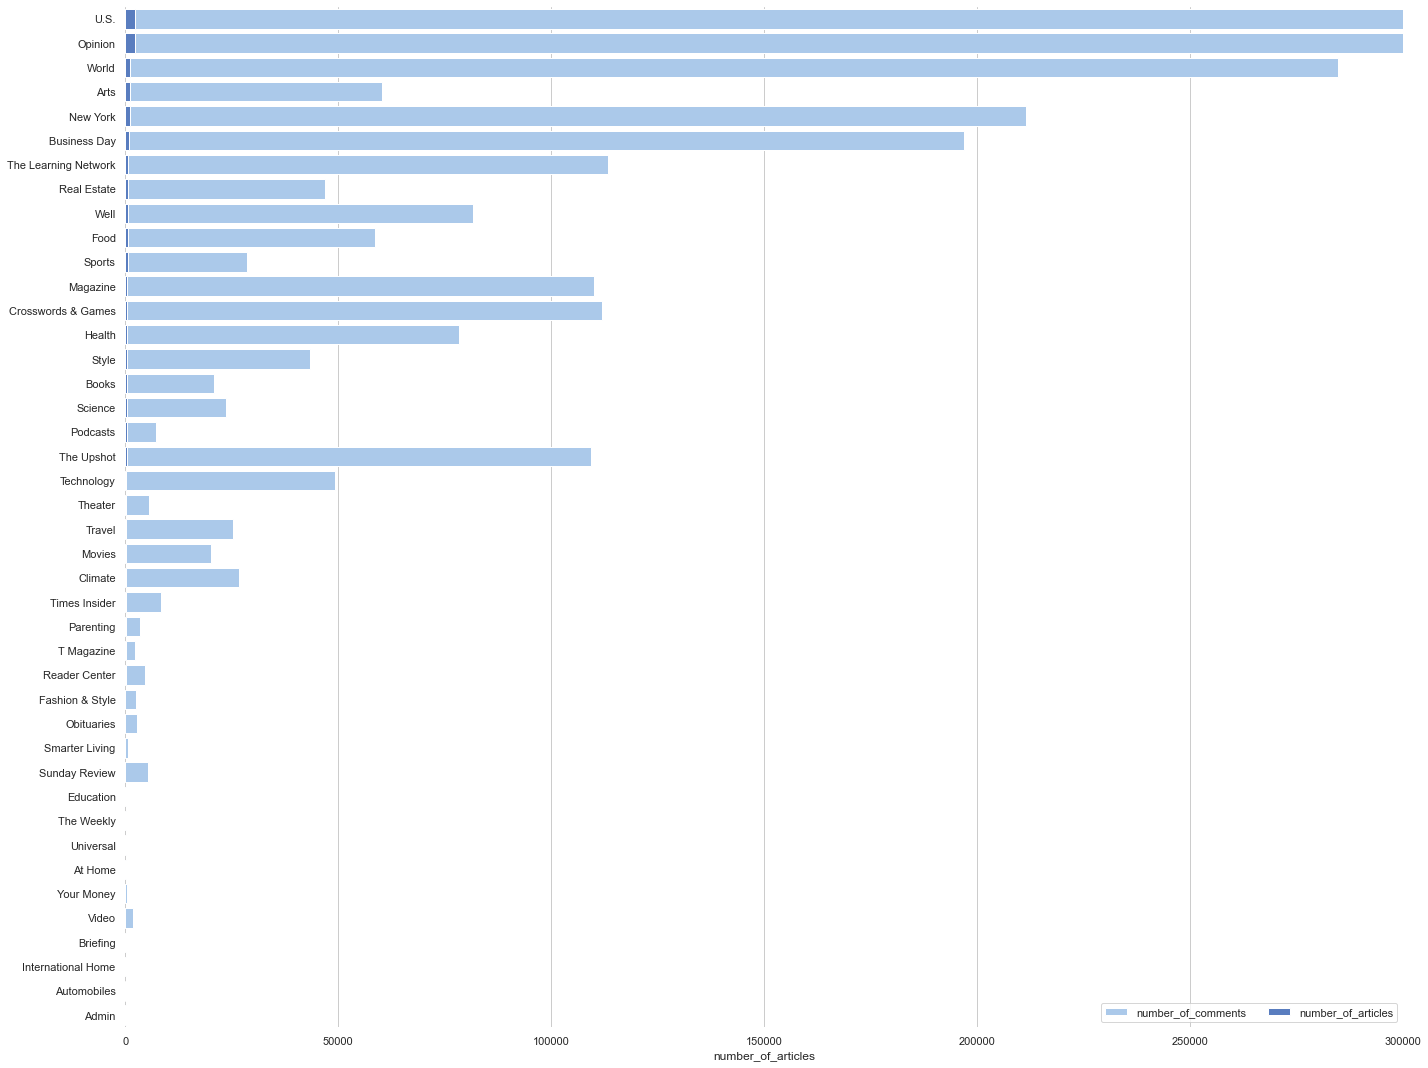

In [14]:
sns.set_theme(style="whitegrid")
section_articles_comments = section_articles_comments.sort_values("number_of_articles", ascending=False)



f, ax = plt.subplots(figsize=(20, 15))


sns.set_color_codes("pastel")
sns.barplot(x="number_of_comments", y="section", data=section_articles_comments,
            label="number_of_comments", color="b",)

sns.set_color_codes("muted")
sns.barplot(x="number_of_articles", y="section", data=section_articles_comments,
            label="number_of_articles", color="b" )

#sns.barplot.sort_by('number_of_articles', ascending=False)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 300000), ylabel="" ),
      # xlabel="Komentarai ir ")
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Populiariausi raktažodžiai ['keywords'] didžiausiuose ir sąlyginai mažuose sections (U.S., Opinion, World, Upshot, Magazine, Business)

In [18]:
nt_new_loc = pd.read_csv('/Users/indre/Desktop/BIG DATA MOKYMU MEDZIAGA/PHYTON/archive/nyt-articles-2020.csv', index_col=1) 

In [19]:
nt_new_loc['keywords'] = nt_new_loc['keywords'].astype(str)

In [20]:
keywords_list_us = nt_new_loc.loc[['U.S.'],['keywords']]
keywords_list_us = pd.Series(' '.join(keywords_list_us['keywords']).lower().split()).value_counts()[:100].reset_index().head(25)
keywords_list_us = keywords_list_us.rename(columns={'index':'word_us', '0': 'word_count'})

In [21]:
keywords_list_opinion = nt_new_loc.loc[['Opinion'],['keywords']]
keywords_list_opinion = pd.Series(' '.join(keywords_list_opinion['keywords']).lower().split()).value_counts()[:100].reset_index().head(25)
keywords_list_opinion = keywords_list_opinion.rename(columns={'index':'word_opinion', '0': 'word_count'})


In [22]:
keywords_list_world = nt_new_loc.loc[['World'],['keywords']]
keywords_list_world = pd.Series(' '.join(keywords_list_world['keywords']).lower().split()).value_counts()[:100].reset_index().head(25)
keywords_list_world = keywords_list_world.rename(columns={'index':'word_world', '0': 'word_count'})


In [23]:
keywords_list_upshot = nt_new_loc.loc[['The Upshot'],['keywords']]
keywords_list_upshot = pd.Series(' '.join(keywords_list_upshot['keywords']).lower().split()).value_counts()[:100].reset_index().head(25)
keywords_list_upshot = keywords_list_upshot.rename(columns={'index':'word_upshots', '0': 'word_count'})

In [24]:
keywords_list_magazine = nt_new_loc.loc[['Magazine'],['keywords']]
keywords_list_magazine = pd.Series(' '.join(keywords_list_magazine['keywords']).lower().split()).value_counts()[:100].reset_index().head(25)
keywords_list_magazine = keywords_list_magazine.rename(columns={'index':'word_magazine', '0': 'word_count'})

In [25]:
keywords_list_business = nt_new_loc.loc[['Business Day'],['keywords']]
keywords_list_business = pd.Series(' '.join(keywords_list_business['keywords']).lower().split()).value_counts()[:100].reset_index().head(25)
keywords_list_business = keywords_list_business.rename(columns={'index':'word_business', '0': 'word_count'})

In [26]:
keywords_list_all  = nt_new_loc['keywords'].reset_index()
keywords_list_all = pd.Series(' '.join(keywords_list_all['keywords']).lower().split()).value_counts()[:100].reset_index().head(25)
keywords_list_all = keywords_list_all.rename(columns={'index':'word_all', '0': 'word_count'})

In [27]:
frequent_words_bysections = pd.concat([keywords_list_us, keywords_list_opinion,keywords_list_world, keywords_list_upshot, keywords_list_magazine,keywords_list_business, keywords_list_all], axis=1)
frequent_words_bysections

,word_us,0,word_opinion,0,word_world,0,word_upshots,0,word_magazine,0,word_business,0,word_all,0
0,and,4562,and,4366,and,1846,and,695,and,694,and,2279,and,26472
1,'united,1522,'united,1583,"(2019-ncov)',",439,'coronavirus,148,states,131,'coronavirus,520,'united,4755
2,states,1495,states,1407,"government',",362,"(2019-ncov)',",145,'united,126,"(2019-ncov)',",500,"(2019-ncov)',",4733
3,of,1432,of,1125,['coronavirus,361,of,137,"(2019-ncov)',",104,'united,417,of,4642
4,politics,1116,politics,1060,'politics,326,'united,126,'coronavirus,81,states,387,'coronavirus,4512
5,donald,1059,donald,1045,'united,305,states,121,of,72,"inc',",235,states,4282
6,election,986,"'trump,",949,'coronavirus,276,election,113,"forces',",59,"economy',",209,donald,2866
7,"j',",940,"government',",939,states,238,"2020',",95,['coronavirus,54,of,200,"government',",2833
8,"government',",909,election,830,of,205,public,71,'black,54,['coronavirus,186,politics,2762
9,"2020',",883,"j',",821,(2019-ncov)'],153,donald,64,"people',",52,"government',",158,"'trump,",2539


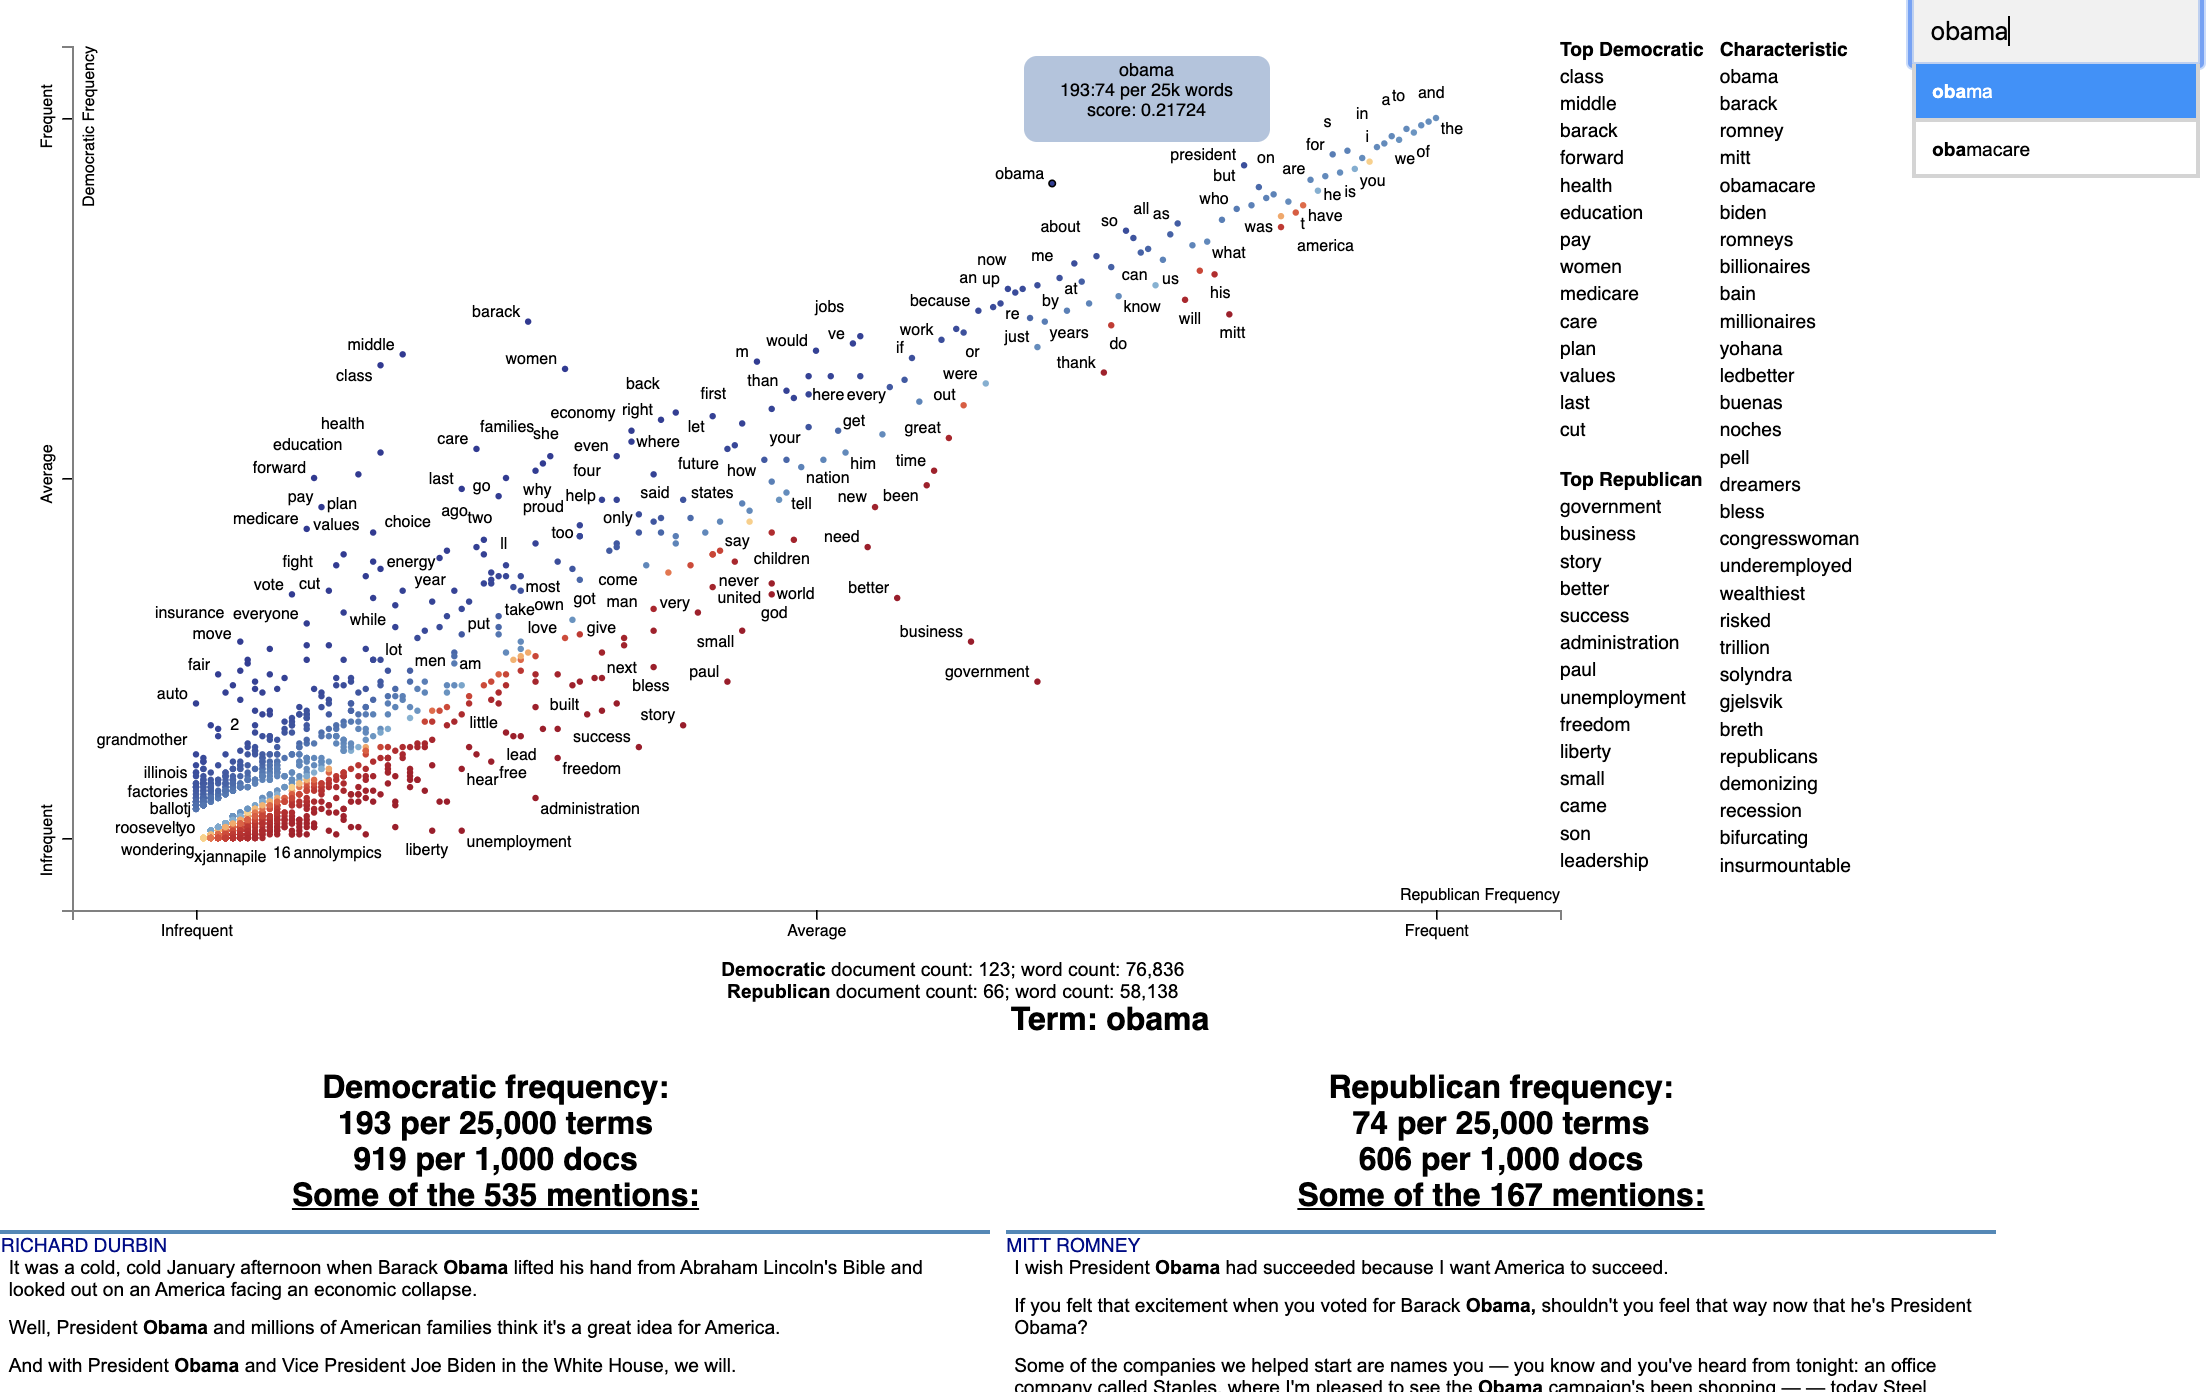
#https://github.com/JasonKessler/scattertext#tutorial 

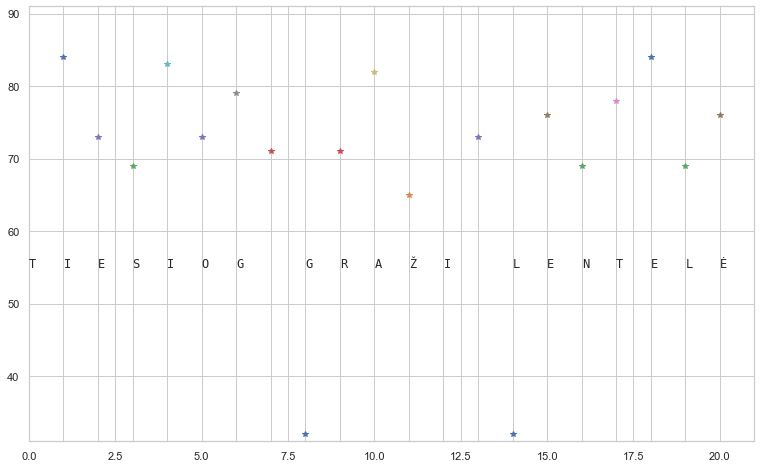

In [28]:
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
plt.figure(figsize=(13,8))

searchstr = 'TIESIOG GRAŽI LENTELĖ'

chars = list(set(searchstr))
chars.sort()
for char in chars:
    indices = [i + 1 for i in range(len(searchstr)) if searchstr[i] == char]
    plt.plot(indices, [ord(char)] * len(indices), '*')

for index, ch in enumerate(searchstr):
    plt.text(index, 55, ch, family='monospace')

plt.xlim(0, len(searchstr))
plt.ylim(ord(' ') - 1, ord('Z') + 1)
plt.gca().xaxis.grid(True, 'minor')
plt.gca().xaxis.grid(True, 'minor')
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.show()

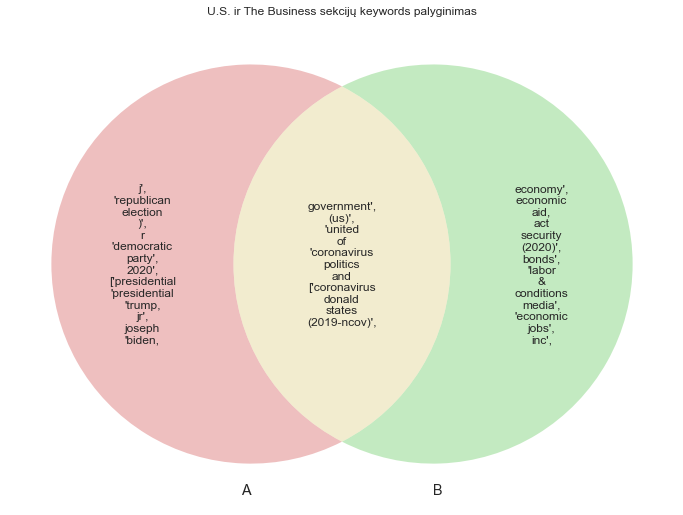

In [29]:
from matplotlib_venn import venn2
plt.figure(figsize=(12,9))
set1 = set(frequent_words_bysections['word_us'])
set2 = set(frequent_words_bysections['word_business'])

plt.title('U.S. ir The Business sekcijų keywords palyginimas')

venn = venn2([set1, set2])
venn.get_label_by_id('100').set_text('\n'.join(map(str,set1-set2)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set1&set2)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set2-set1)))
# venn.get_label is quoted from https://stackoverflow.com/questions/55717203/plot-actual-set-items-in-python-not-the-number-of-items

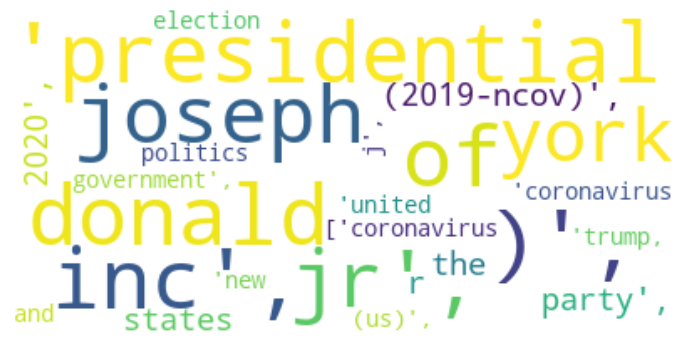

In [30]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = frequent_words_bysections['word_all']
counts = df.value_counts()
counts.index = counts.index.map(str)
wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure(figsize=(12,9))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(counts)

# stopwords = set(STOPWORDS)
# stopwords.update(["corona", "trump", "2020",])
# wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Ar strapsnių skaičius koreliuoja su komentarų skaičiumi?

In [31]:
from sklearn.linear_model import  LinearRegression

In [32]:
section_articles_comments

,section,number_of_comments,number_of_articles
36,U.S.,1156457,2364
18,Opinion,2082114,2272
40,World,284874,1183
1,Arts,60180,1094
16,New York,211581,1055
6,Business Day,196889,932
30,The Learning Network,113314,708
22,Real Estate,46987,687
39,Well,81669,630
11,Food,58564,573


In [33]:
X= section_articles_comments[['number_of_articles']]

In [34]:
y= section_articles_comments['number_of_comments']

In [35]:
model = LinearRegression()

In [36]:
model.fit(X, y) 

LinearRegression()

In [37]:
prediction = model.predict(X).round()

In [38]:
section_articles_comments['Prediction'] = prediction 
section_articles_comments          

,section,number_of_comments,number_of_articles,Prediction
36,U.S.,1156457,2364,1204325.0
18,Opinion,2082114,2272,1153480.0
40,World,284874,1183,551631.0
1,Arts,60180,1094,502444.0
16,New York,211581,1055,480890.0
6,Business Day,196889,932,412913.0
30,The Learning Network,113314,708,289116.0
22,Real Estate,46987,687,277510.0
39,Well,81669,630,246009.0
11,Food,58564,573,214507.0


In [39]:
model.predict([[200]])

array([8363.86966737])

In [40]:
r_squared = model.score(X, y) 
r_squared

0.6989108894456372

Text(0.5, 1.0, 'Koreliacija tarp straipsnių skaičiaus ir komentarų skaičiaus')

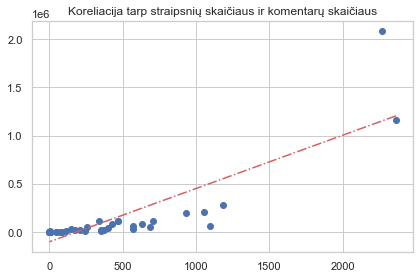

In [41]:
plt.scatter(X,y)
plt.plot(X, prediction, 'r', linestyle='-.')
plt.tight_layout()
plt.title('Koreliacija tarp straipsnių skaičiaus ir komentarų skaičiaus')

### Išvada – koreliacija silpna, ant strapsnių skaičiaus - pinigų nestatyčiau :) Kad nuspėti reikėtų analizuoti su section arba keywords :)

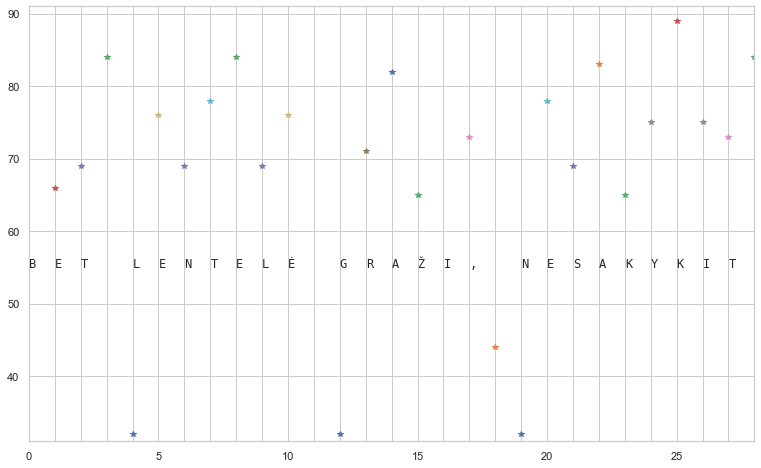

In [42]:
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
plt.figure(figsize=(13,8))

searchstr = 'BET LENTELĖ GRAŽI, NESAKYKIT'

chars = list(set(searchstr))
chars.sort()
for char in chars:
    indices = [i + 1 for i in range(len(searchstr)) if searchstr[i] == char]
    plt.plot(indices, [ord(char)] * len(indices), '*')

for index, ch in enumerate(searchstr):
    plt.text(index, 55, ch, family='monospace')

plt.xlim(0, len(searchstr))
plt.ylim(ord(' ') - 1, ord('Z') + 1)
plt.gca().xaxis.grid(True, 'minor')
plt.gca().xaxis.grid(True, 'minor')
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.show()